<a href="https://colab.research.google.com/github/qazwsx351789/DEEP-LEARNING-FOR-BIG-VISUAL-DATA/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

In [ ]:
import torch

In [ ]:
print(torch.__version__, torch.cuda.is_available())
!gcc --version

2.0.0+cu118 True
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



### (a) Tensor

Construct an uninitialized 4x4 matrix:





In [ ]:
# todo
x = torch.empty(4,4)
print(x)

tensor([[4.6665e-27, 4.5593e-41, 4.6665e-27, 4.5593e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.0068e-27, 4.5593e-41, 2.0076e-27, 4.5593e-41],
        [3.1898e+01, 2.0422e+32, 2.1293e-27, 4.5593e-41]])


Construct a randomly initialized 3x3 matrix from a uniform distribution on the interval [0, 10)

In [ ]:
# todo
x = torch.rand(3,3)*10
print(x)

tensor([[0.5900, 2.9652, 4.4322],
        [9.0550, 4.4569, 9.6509],
        [1.2318, 2.1274, 5.6474]])


Construct a 2x2 matrix filled zeros with data type float32:

In [ ]:
# todo
x = torch.zeros(2,2,dtype = torch.float32)
print(x)

tensor([[0., 0.],
        [0., 0.]])


Construct a 2x2 matrix from the normal distribution with zero mean and one
std with the same shape as x.

y's data type should be float32.

Print the size of x and y.

In [ ]:
x = torch.ones(5, 5, dtype=torch.float64)
# todo
y = torch.randn_like(x[:2, :2],dtype=torch.float32)

print(y)
# todo: print the size of x and y
print(x.shape,y.shape)

tensor([[ 1.0035, -0.7451],
        [ 0.0139, -1.5806]])
torch.Size([5, 5]) torch.Size([2, 2])


### (b) Operations

Addition: Print x + y

In [ ]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)
print(x)
print(y)
# todo
print(x+y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[4., 5.],
        [6., 7.]])
tensor([[ 5.,  7.],
        [ 9., 11.]])


Addition: add y and x inplace (modify y)

In [ ]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)

# todo: adds x to y
y.add_(x)
print(y)

tensor([[ 5.,  7.],
        [ 9., 11.]])


Indexing

In this part, you will use indexing techniques to access part of data store in tensor **x**.
x is a 3x3x3 matrix.

For simplicity, we let (a, b, c) represents the a-th in the first axis, b-th in the second axis and c-th in the third axis, a, b and c start from 0,

e.g get x at (0, 1, 1) is to get the first in the first axis, second in the second axis and second in the third axis of x, which returns 5.

We also let getting x at (0:2, 1, 1) mean get the first two rows in the first axis, second in the second axis and second in the third axis.

Hint: You should use standard NumPy-like indexing.


In [ ]:
x = torch.arange(1, 28, dtype=torch.int32).reshape(3, 3, 3)
print(x)
# Example: get (0, 1, 1) of x
print(x[0, 1, 1])
# Example: get (0:2, 1, 1) of x
print(x[0:2, 1, 1])

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]], dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor([ 5, 14], dtype=torch.int32)


In [ ]:
# todo: get (1, 2, 1) of x
print(x[1, 2, 1])
# todo: get (0, 1:3, 1) of x
print(x[0, 1:3, 1])
# todo: get (1:3, 0:3, 1:3) of x
print(x[1:3, 0:3, 1:3])

tensor(17, dtype=torch.int32)
tensor([5, 8], dtype=torch.int32)
tensor([[[11, 12],
         [14, 15],
         [17, 18]],

        [[20, 21],
         [23, 24],
         [26, 27]]], dtype=torch.int32)


Resizing

In [ ]:
A = torch.arange(12)
print(A)

# todo: resize A to 3x4 using view
A=A.view(3,4)
print(A)
# todo: resize A to 4x3 using reshape
A=A.reshape(4,3)
print(A)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


Question: what is the difference between view and reshape of a tensor?

view()  is only applicable to tensors that meet the continuity conditions, and this operation will not open up new memory space.

reshape() returns a new tensor that has the same data as the original tensor, but the data is laid out in a new shape

## Problem 2

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [ ]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [ ]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive.

Different from HW1, we downsample the data from 28x28 to 14x14.
The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

In [ ]:
from scipy.io import loadmat
import torch
import torchvision.transforms as T


mnist = loadmat('/content/gdrive/My Drive/Data/mnist_2.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.

# convert data to torch, normalize and reshape
data = torch.reshape(torch.from_numpy(mnist['traindata']).to(torch.float)/255.0 - 0.5, (mnist['traindata'].shape[0], 1, 28, 28))
testdata = torch.reshape(torch.from_numpy(mnist['testdata']).to(torch.float)/255.0 - 0.5, (mnist['testdata'].shape[0], 1, 28, 28))

trainlabels = torch.from_numpy(mnist['trainlabels'].ravel()[:50000])
validlabels = torch.from_numpy(mnist['trainlabels'].ravel()[50000:])

resize = T.Resize((14,14))
data = resize(data)
testdata = resize(testdata)
traindata = data[:50000]
validdata = data[50000:]


print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([50000, 1, 14, 14])
torch.Size([50000])
torch.Size([10000, 1, 14, 14])
torch.Size([10000])
torch.Size([10000, 1, 14, 14])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

mnist_train = TensorDataset(traindata, trainlabels)
mnist_valid = TensorDataset(validdata, validlabels)
mnist_valid_loader = DataLoader(mnist_valid, batch_size=128)



Visualize an image with label.

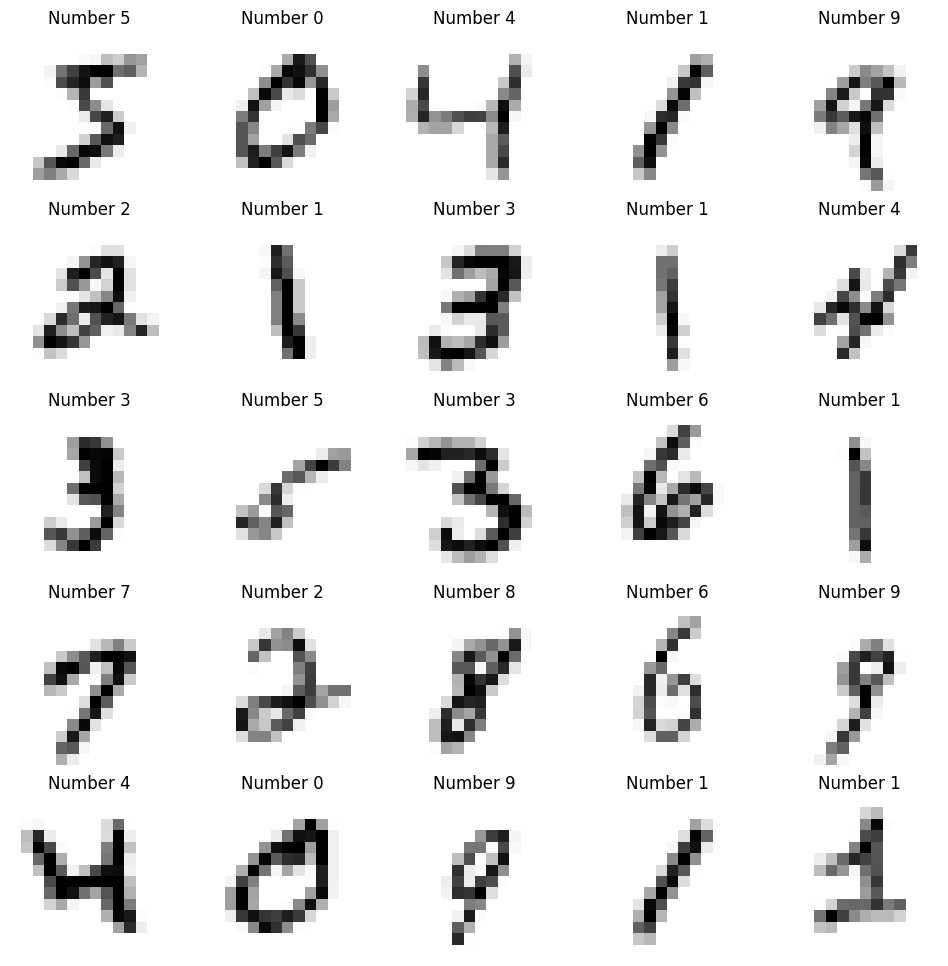

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow((mnist_train[i][0] + 0.5 ).reshape((14, 14)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

(b) Multilayer Perceptron (MLP)

Use MLP to achieve image classification.

Define the following MLP using PyTorch to do image classification on MNIST dataset according to the below figure:
Number of hidden layers: 3
Number of neurons in the layers: [100, 50, 20]
Activation functions: ReLU()
Dropout for all hidden layers: 30%
Output layer + softmax


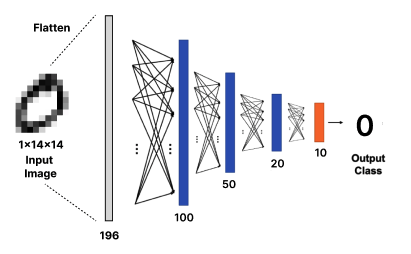

To feed the data into the MLP, each image with dim of $1 \times 14 \times 14$ needs to be flatten into a vector with dim of $196.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [ ]:
# use GPU to train if possible
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
device = 'cpu'

cuda:0


In [ ]:
# from torch.autograd.grad_mode import F
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # TODO: define your MLP
    self.fc1 = nn.Linear(1*14*14,100)
    self.fc2 = nn.Linear(100,50)
    self.fc3 = nn.Linear(50,20)
    self.fc4 = nn.Linear(20,10)
    self.dropout = nn.Dropout(p=0.3)

  def forward(self, x):
    # TODO: define your forward function
    x =x.view(-1,self.num_flat_features(x))
    x = nn.ReLU()(self.fc1(x))
    x = self.dropout(x)
    x = nn.ReLU()(self.fc2(x))
    x = self.dropout(x)
    x = nn.ReLU()(self.fc3(x))
    x = self.dropout(x)
    x = self.fc4(x)

    return x
  def num_flat_features(self, x):
      size = x.size()[1:]
      num_features = 1
      for i in size:
        num_features *= i
      return num_features


In [ ]:

mlp = MLP()
print()
input = torch.randn(1,1,14,14)
out = mlp(input)
print(out)


tensor([[ 0.0158, -0.0502, -0.0264, -0.2100, -0.0292, -0.2127, -0.1034,  0.0010,
         -0.0236, -0.0223]], grad_fn=<AddmmBackward0>)


In [ ]:
# TODO: write your training code
def train(dataloader,model,loss_fn,optimizer):
  device = 'cuda:0'
  size = len(dataloader.dataset)
  for batch,(X,y) in enumerate(dataloader):
    X = X.to(device=device)
    y = y.to(device=device)
    pred = model(X)
    loss = loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

# TODO: write your testing code
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct = 0 ,0

  with torch.no_grad():
    for x,y in dataloader:
      pred = model(x)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%,Avg loss: {test_loss:>8f} \n")


In [ ]:
mlp = MLP().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()
# optimizer = optim.SGD(mlp.parameters(), lr=0.001, weight_decay=0)
optimizer = optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [ ]:
n_epoch = 10
from torch.utils.data import DataLoader
# todo: use your train() to train the model
mnist_train_loader = DataLoader(mnist_train, batch_size=128)
for epoch in range(n_epoch):
  train(mnist_train_loader,mlp,criterion,optimizer)


loss: 2.317509 [    0/50000]
loss: 1.688892 [12800/50000]
loss: 1.004672 [25600/50000]
loss: 0.986514 [38400/50000]
loss: 0.840039 [    0/50000]
loss: 0.777618 [12800/50000]
loss: 0.713605 [25600/50000]
loss: 0.660964 [38400/50000]
loss: 0.517994 [    0/50000]
loss: 0.590127 [12800/50000]
loss: 0.546144 [25600/50000]
loss: 0.498428 [38400/50000]
loss: 0.358612 [    0/50000]
loss: 0.473533 [12800/50000]
loss: 0.452700 [25600/50000]
loss: 0.438109 [38400/50000]
loss: 0.393008 [    0/50000]
loss: 0.379034 [12800/50000]
loss: 0.316211 [25600/50000]
loss: 0.462395 [38400/50000]
loss: 0.340111 [    0/50000]
loss: 0.397403 [12800/50000]
loss: 0.493754 [25600/50000]
loss: 0.327117 [38400/50000]
loss: 0.267311 [    0/50000]
loss: 0.436877 [12800/50000]
loss: 0.333398 [25600/50000]
loss: 0.278094 [38400/50000]
loss: 0.327372 [    0/50000]
loss: 0.450780 [12800/50000]
loss: 0.329327 [25600/50000]
loss: 0.323077 [38400/50000]
loss: 0.263419 [    0/50000]
loss: 0.274758 [12800/50000]
loss: 0.340756

Save the trained model.
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [ ]:
PATH = '/content/gdrive/My Drive/mlp_mnist.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [ ]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [ ]:
print(mlp)
# todo: use your test() to test your MLP on val set
test(mnist_valid_loader,mlp,criterion)


MLP(
  (fc1): Linear(in_features=196, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Test Error: 
 Accuracy: 91.2%,Avg loss: 0.328359 



(c) Convolution Neural Network (CNN)

Built a LeNet-5 using PyTorch to do image classification. Develop the CNN from the PyTorch NN tutorial introduced in class.

Note:
1. The input image dimension shown in the figure below is different from the one we have in this problem.
2. Use kernel size=3 for both convolutions (Original LeNet-5 uses kernel size=5 as shown in the Fig.3 of HW2.pdf)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN ,self).__init__()
    # TODO: define your CNN
    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*2*2, 50)
    self.fc2 = nn.Linear(50, 20)
    self.fc3 = nn.Linear(20, 10)

  def forward(self, x):
    # TODO: define your forward function
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x
  def num_flat_features(self, x):
      size = x.size()[1:]
      num_features = 1
      for i in size:
        num_features *= i
      return num_features

cnn_mnist = CNN().to(device)  # operate on GPU

In [ ]:
print()
input = torch.randn(1,1,14,14)
out = cnn_mnist(input)
print(out)


tensor([[ 0.1778, -0.0621,  0.2263,  0.2768, -0.1955, -0.0716, -0.0496,  0.0393,
         -0.1345, -0.0387]], grad_fn=<AddmmBackward0>)


In [ ]:
# todo: similar to MLP, train your CNN model
n_epoch = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_mnist.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
for epoch in range(n_epoch):
  train(mnist_train_loader,cnn_mnist,criterion,optimizer)

loss: 2.306437 [    0/50000]
loss: 1.525425 [12800/50000]
loss: 0.667066 [25600/50000]
loss: 0.605920 [38400/50000]
loss: 0.469192 [    0/50000]
loss: 0.315153 [12800/50000]
loss: 0.309894 [25600/50000]
loss: 0.321142 [38400/50000]
loss: 0.255661 [    0/50000]
loss: 0.201650 [12800/50000]
loss: 0.198906 [25600/50000]
loss: 0.258571 [38400/50000]
loss: 0.170648 [    0/50000]
loss: 0.146787 [12800/50000]
loss: 0.135957 [25600/50000]
loss: 0.202078 [38400/50000]
loss: 0.126343 [    0/50000]
loss: 0.120060 [12800/50000]
loss: 0.095986 [25600/50000]
loss: 0.163200 [38400/50000]
loss: 0.103569 [    0/50000]
loss: 0.109160 [12800/50000]
loss: 0.079843 [25600/50000]
loss: 0.136138 [38400/50000]
loss: 0.089048 [    0/50000]
loss: 0.104221 [12800/50000]
loss: 0.073218 [25600/50000]
loss: 0.118063 [38400/50000]
loss: 0.082642 [    0/50000]
loss: 0.099432 [12800/50000]
loss: 0.069674 [25600/50000]
loss: 0.102692 [38400/50000]
loss: 0.078455 [    0/50000]
loss: 0.094553 [12800/50000]
loss: 0.066078

In [ ]:
print(cnn_mnist)
# todo: use your test() to test your CNN on val set
test(mnist_valid_loader,cnn_mnist,criterion)


CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)
Test Error: 
 Accuracy: 96.9%,Avg loss: 0.103943 



## Problem 3: Image Classification by CNN

Write code to load and visualize the CIFAR-10 dataset.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size.

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [ ]:
from torchvision import transforms, datasets
from torch.utils.data import TensorDataset, DataLoader
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_trainset = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_loader = DataLoader(cifar10_trainset, batch_size=len(cifar10_trainset), shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=len(cifar10_testset), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
from torch.utils.data import DataLoader

for idx , (img , label) in enumerate(cifar_loader) :
      print(img.size() , label.size())
      print(label)
      break

torch.Size([50000, 3, 32, 32]) torch.Size([50000])
tensor([6, 9, 9,  ..., 9, 1, 1])


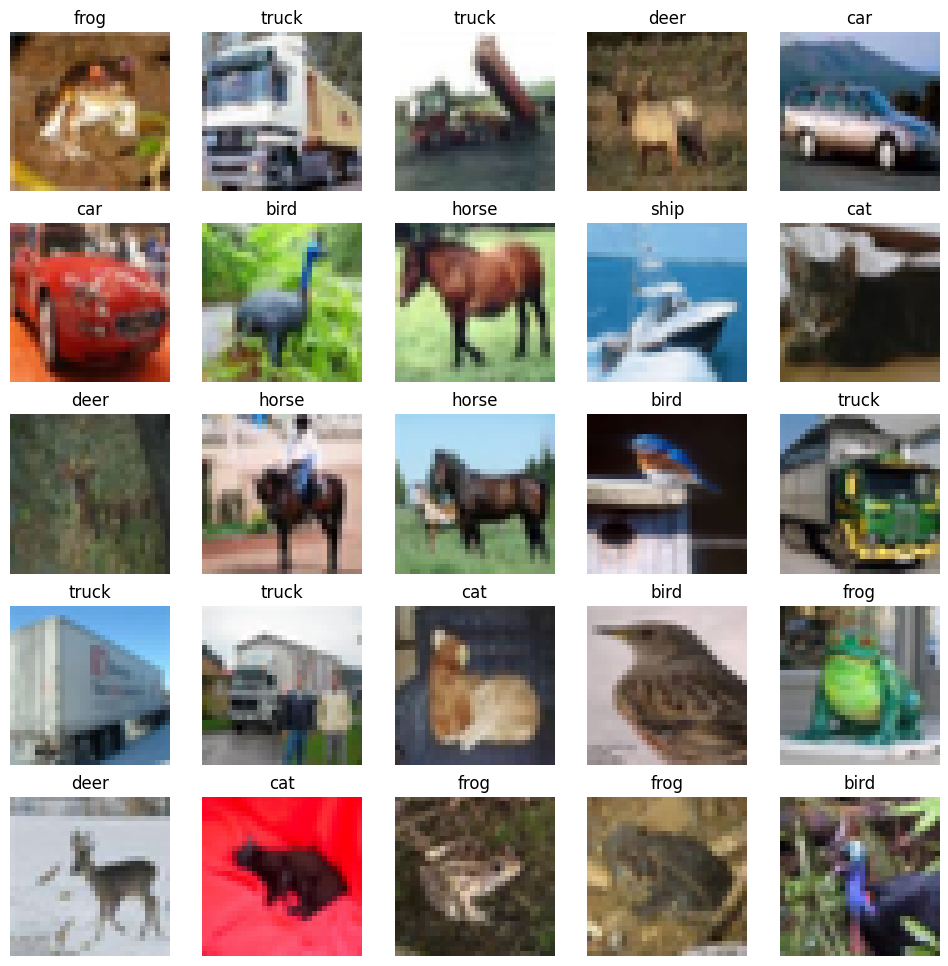

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img /2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset
fig, axs = plt.subplots(5, 5, figsize = (12, 12))

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):

  ax.imshow(cifar_imshow(cifar10_trainset[i][0]))
  ax.axis('off')
  ax.set_title('{}'.format(classes[cifar10_trainset[i][1]]))

In [ ]:
cifar10_trainset[1][1]

9

#### Data Augmentation

In [ ]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# todo: Implements transforms

# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Rotating: randomly rotate the images by some angles.
transform3 = transforms.Compose([
    transforms.RandomAffine(degrees=45),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Flipping: horizontally flip the images.
# I'm not sure whether flipping need "random" or not.So I set p=1
transform4 = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=1),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose([transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  augmented_dataset.append(datasets.CIFAR10(root='./data/', train=True, download=True, transform=t))

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform1)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous problem and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

(1) Define a CNN using PyTorch to do image classification. Develop the CNN from the previous PyTorch NN tutorial.

In [ ]:
# use GPU to train if possible
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super(CNN1,self).__init__()
    # TODO: define your CNN
    self.conv1 = nn.Conv2d(3,12,kernel_size=3, dilation=1,stride=1,padding ="same")
    self.conv2 = nn.Conv2d(12,32,kernel_size=5, dilation=1,stride=1,padding ="same")
    self.conv3 = nn.Conv2d(32,32,kernel_size=3, dilation=1,stride=1,padding ="same")
    self.conv4 = nn.Conv2d(32,32,kernel_size=5, dilation=1,stride=1,padding ="same")
    self.conv5 = nn.Conv2d(32,64,kernel_size=3, dilation=1,stride=1,padding ="same")


    self.fc1 = nn.Linear(512, 128)
    self.dropout = nn.Dropout(p=0.3)
    self.fc2 = nn.Linear(128, 20)
    self.fc3 = nn.Linear(20, 10)
    # self.fc5 = nn.Linear(20, 10)


  def forward(self, x):
    # TODO: define your forward function


    x = F.relu(self.conv1(x))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = self.dropout(x)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(F.relu(self.conv4(x)),2)
    x = self.dropout(x)
    x = F.relu(self.conv5(x))


    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = (self.fc3(x))

    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for i in size:
      num_features *= i
    return num_features

cnn1 = CNN1().to(device)  # operate on GPU

In [ ]:
# TODO: write your training code
def train(dataloader,model,loss_fn,optimizer):
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  size = len(dataloader.dataset)
  for batch,(X,y) in enumerate(dataloader):
    X = X.to(device=device)
    y = y.to(device=device)
    pred = model(X)
    loss = loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

# TODO: write your testing code
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct = 0 ,0

  with torch.no_grad():
    for x,y in dataloader:
      pred = model(x)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%,Avg loss: {test_loss:>8f} \n")


Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

In [ ]:
# todo: use your train() to train your cnn1
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=128, shuffle=False)
n_epoch=5
for epoch in range(n_epoch):
  train(cifar_loader,cnn1,criterion,optimizer)

OutOfMemoryError: ignored

Evaluate the classfication performance on the testing set.

In [ ]:
# todo: use your test() to test your cnn1

test(cifar_test_loader,cnn1,criterion)

Test Error: 
 Accuracy: 64.2%,Avg loss: 1.077902 



(2) Try different network parameters/configurations (at least 5 combinations).

You should try to achieve at least **80%** accuracy on the CIFAR-10 testing set using one of your network configuration.


Performances using different configurations

todo: past your performance v.s different network configurations in a table.

In [ ]:
class reach_80_percent(nn.Module):
  def __init__(self):
    super(reach_80_percent,self).__init__()
    # TODO: define your CNN
    self.conv1 = nn.Conv2d(3,16,kernel_size=3, dilation=1,stride=1,padding ="same")
    self.conv2 = nn.Conv2d(16,64,kernel_size=5, dilation=1,stride=1,padding ="same")
    self.conv3 = nn.Conv2d(64,64,kernel_size=3, dilation=1,stride=1,padding ="same")
    self.conv4 = nn.Conv2d(64,128,kernel_size=5, dilation=1,stride=1,padding ="same")
    self.conv5 = nn.Conv2d(128,256,kernel_size=3, dilation=1,stride=1,padding ="same")
    self.fc1 = nn.Linear(4096, 10)
    self.dropout = nn.Dropout(p=0.3)

  def forward(self, x):
    # TODO: define your forward function


    x = F.relu(self.conv1(x))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = self.dropout(x)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(F.relu(self.conv4(x)),2)
    x = self.dropout(x)
    x = F.max_pool2d(F.relu(self.conv5(x)),2)
    x = self.dropout(x)

    x = x.view(-1,self.num_flat_features(x))
    x = (self.fc1(x))

    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for i in size:
      num_features *= i
    return num_features


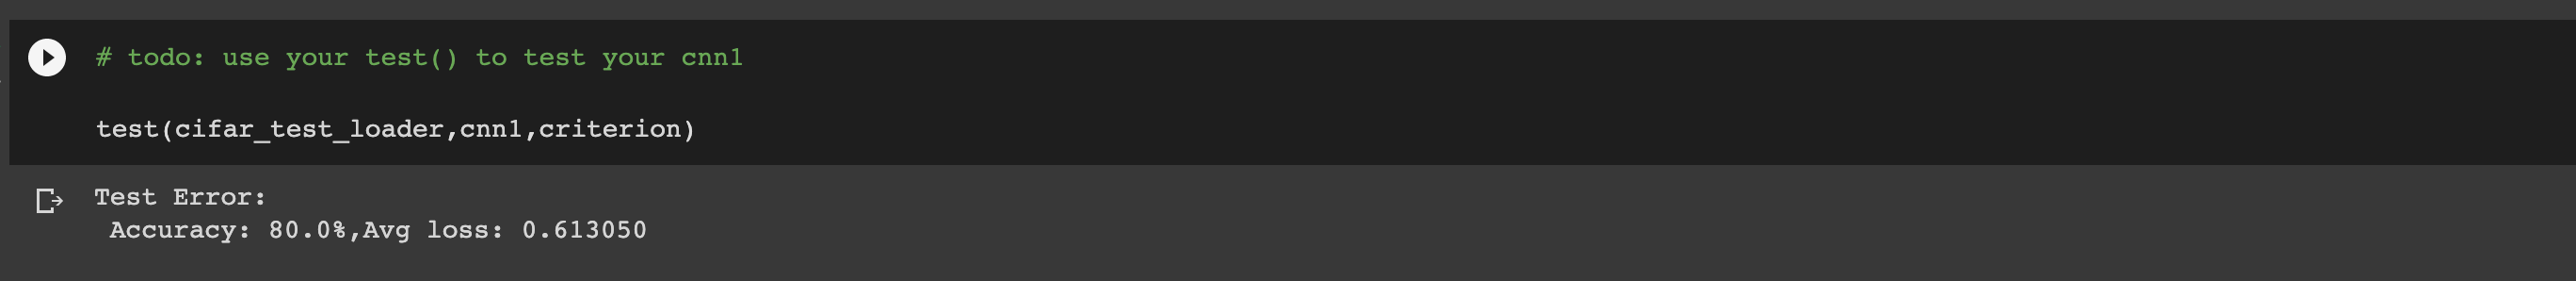

In [ ]:
from tabulate import tabulate

headers = ["# of conv", "Kernel size (conv)", "Stride (cov)","Dilation","Dropout in FC","Accuracy","Avg loss"]
data = [["2(conv:2,pool:1)(3~96~256,output:10)", "3X3","1X1","1X1" ,"0%","68.7%","0.907188"],
        ["2(conv:2,pool:1)(3~96~256,output:10)", "5X5","1X1","1X1" ,"30%","64.5%","1.041546 "],
        ["2(conv:2,pool:1)(3~16~32,output:10)", "5X5","1X1","1X1" ,"0%","71.1%","0.839320 "],
        ["2(conv:2,pool:0)(3~96~256,output:10)", "5X5","1X1","3X3" ,"0%","60.7%","1.101804  "],
        ["5(conv:5,pool:1)(3~16~32~64~128~256,output:10)", "3X3","1X1","1X1" ,"0%","73.3%","0.808547  "],
        ["5(conv:5,pool:0)(3~16~32~64~128~256,output:10)", "5X5","3X3","1X1" ,"30%","65.8%","0.953903 "],
        ["5(conv:5,pool:3,mlp:3)(3~16~32~64~93~128~256~128,output:10)", "3X3(2),5X5(3)","1X1","1X1" ,"30%","76.2%","0.727394  "],
        ["5(conv:5,pool:3)(3~16~64~64~128~256,output:10)", "3X3(4),5X5(1)","1X1","1X1" ,"30%","78.6%","0.651914 "],
        ["5(conv:5,pool:3)(3~16~64~64~128~256,output:10)", "3X3(3),5X5(2)","1X1","1X1" ,"30%","80.0%","0.613050 "],
        ["9(conv:9,pool:4)(3~6~16~32~64~128~256~300~512~600,output:10)", "3X3","1X1","1X1" ,"0%","59.5%","1.128089 "],
        ["9(conv:9,pool:4)(3~12~32~32~32~64~64~64~128~128,output:10)", "3X3(5),5X5(4)","1X1","1X1" ,"30%","64.2%","1.077902 "],
        ]


table = tabulate(data, headers, tablefmt="grid")

print(table)

+--------------------------------------------------------------+----------------------+----------------+------------+-----------------+------------+------------+
| # of conv                                                    | Kernel size (conv)   | Stride (cov)   | Dilation   | Dropout in FC   | Accuracy   |   Avg loss |
+==============================================================+======================+================+============+=================+============+============+
| 2(conv:2,pool:1)(3~96~256,output:10)                         | 3X3                  | 1X1            | 1X1        | 0%              | 68.7%      |   0.907188 |
+--------------------------------------------------------------+----------------------+----------------+------------+-----------------+------------+------------+
| 2(conv:2,pool:1)(3~96~256,output:10)                         | 5X5                  | 1X1            | 1X1        | 30%             | 64.5%      |   1.04155  |
+---------------------------

####  Discussion

(1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

(2) Based on your experiments in Problem3, which parameter can potentially affect your performance most?



1.CNN can achieve higher accuracy because of it ability to characterize features.In ML the most important thing to influence the accuracy is feature,so CNN can perform better then MLP.



2.I think the layers of conv potentially affects my performance most because the number of conv determines the depth of the network .Dropout is used to prevent overfitting,and the other parameters need try and error to determine the numbers.